
# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>TMDB Movie Data is the selected dataset for analyzing. It consists of 21 columns / fields and 10866 rows / records. 
This data set contains information about 10,866 movies collected from The Movie Database (TMDb), using 21 pieces of information describing each movie.
>
>Available data for each movie are id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj.
Descriptive statistical analysis will be performed to get some insights to answer the following eight questions as follows:

>1. What is the film that has maximum vote score? (Best movie according to viewers' ratings?)

>2. What is the film that has minimum vote score? (Worst movie according to viewers' ratings?)

>3. What is best movie for each year?  (What is the highest vote score for each year?)

>4. What are the best 10 movies? (Top 10)

>5. What are the worst 10 movies?  (Least 10)

>6. What is the most popular genre?

>7. What is the relationship between movie' budget and its revenue?

>8. What is the total revenue of each year? (cumulative sum of revenue of this industry / business year by year)






In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# download a csv file named "tmdb-movies.csv" and read it into dataframe named "df1" using pandas 

df1=pd.read_csv('tmdb-movies.csv')

In [4]:
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df1.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
df1.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7631,19580,tt0800328,0.343105,0,0,The Dukes of Hazzard: The Beginning,Jonathan Bennett|Randy Wayne|April Scott|Joel ...,NaN,Robert Berlinger,These are the Duke boys... from the beginning!,...,"Cousins Bo, Luke and Daisy are sent to Hazzard...",95,Action|Adventure|Comedy,Warner Premiere,3/4/07,34,4.7,2007,0.000000e+00,0.000000e+00
1425,25475,tt1216516,1.416811,0,0,Tinker Bell and the Lost Treasure,Mae Whitman|Jesse McCartney|Jane Horrocks|Lucy...,http://disneydvd.disney.go.com/tinker-bell-and...,Klay Hall,Adventure beyond Pixie Hollow,...,"A blue harvest moon will rise, allowing the fa...",81,Animation|Family|Adventure|Fantasy,DisneyToon Studios|Walt Disney Animation Studi...,9/3/09,137,6.5,2009,0.000000e+00,0.000000e+00
10440,571,tt0056869,1.139321,2500000,11403529,The Birds,Tippi Hedren|Rod Taylor|Suzanne Pleshette|Vero...,NaN,Alfred Hitchcock,"...and remember, the next scream you hear may ...",...,Chic socialite Melanie Daniels enjoys a passin...,119,Horror,Alfred J. Hitchcock Productions,3/28/63,434,7.0,1963,1.780045e+07,8.119517e+07
7536,14158,tt1117523,0.543629,0,0,Jackass 2.5,Bam Margera|Steve-O|Chris Pontius|Johnny Knoxv...,NaN,Jeff Tremaine,NaN,...,The crew have now set off to finish what as le...,64,Comedy|Documentary,Paramount Pictures Digital Entertainment,12/18/07,83,6.1,2007,0.000000e+00,0.000000e+00
9256,10705,tt0097499,0.294611,9000000,0,Henry V,Kenneth Branagh|Derek Jacobi|Brian Blessed|Jam...,NaN,Kenneth Branagh,The great adventure of a king who defied the o...,...,Gritty adaption of William Shakespeare's play ...,137,War|Drama|History|Action|Romance,BBC Films|Samuel Goldwyn Company|Renaissance F...,10/5/89,27,7.4,1989,1.583086e+07,0.000000e+00
8708,8584,tt0184894,0.770457,55000000,56932305,Shanghai Noon,Jackie Chan|Owen Wilson|Lucy Liu|Xander Berkel...,NaN,Tom Dey,The old west meets the far east.,...,"Chon Wang, a clumsy imperial guard trails Prin...",110,Adventure|Action|Comedy|Western,Spyglass Entertainment|Roger Birnbaum Producti...,5/26/00,411,6.1,2000,6.964607e+07,7.209293e+07
7291,11610,tt0069097,0.170549,0,0,"Play It Again, Sam",Woody Allen|Diane Keaton|Tony Roberts|Jerry La...,NaN,Herbert Ross,"Here's laughing at you, kid.",...,A mild mannered film critic is dumped by his w...,85,Comedy|Drama|Romance,Paramount Pictures,5/4/72,50,7.2,1972,0.000000e+00,0.000000e+00
3123,8884,tt0893402,0.359106,12000000,0,Franklyn,Eva Green|Ryan Phillippe|Bernard Hill|Sam Rile...,NaN,Gerald McMorrow,Reality is a state of mind.,...,Set between the parallel worlds of contemporar...,98,Drama|Fantasy|Science Fiction,UK Film Council|Aramid Entertainment Fund|Film...,10/16/08,41,5.5,2008,1.215344e+07,0.000000e+00
2881,10764,tt0830515,3.086676,200000000,586090727,Quantum of Solace,Daniel Craig|Olga Kurylenko|Mathieu Amalric|Ju...,http://www.mgm.com/view/movie/234/Quantum-of-S...,Marc Forster,"For love, for hate, for justice, for revenge.",...,Quantum of Solace continues the adventures of ...,106,Adventure|Action|Thriller|Crime,Eon Productions,10/30/08,2149,6.0,2008,2.025573e+08,5.935849e+08
7970,13681,tt0087921,0.212188,0,0,Places in the Heart,Sally Field|Lindsay Crouse|John Malkovich|Dann...,NaN,Robert Benton,NaN,...,"In 1930s Southern US, a widow and her family t...",111,Drama|Family,TriStar Pictures|Delphi II Productions,6/1/84,13,5.7,1984,0.000000e+00,0.000000e+00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# from the above, it is clear that:-
    # imdb_id contains 10 nan
    # generes contains nan
    # release_date' type is not datetime, its type is object

In [9]:
#check duplication

df1[df1.id.duplicated()]           
           

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
# row that has id = 42194 is duplicated (twice)

In [11]:
df1[df1.original_title.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,...,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",...,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,...,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/66,99,5.9,1966,9.256081e+06,0.000000e+00
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00


In [12]:
# by visual inspection of csv file it is found that the same film name but they are different films : name similarity
# no need to treat

In [13]:
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
#image_predictions_df['p1'].value_counts()
df1['budget'].value_counts()

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
51500000       1
25500000       1
1350000        1
7920000        1
4653000        1
Name: budget, Length: 557, dtype: int64

In [15]:
# 5696 films with zero budget ????
df1[df1.budget== 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


In [16]:
df1[df1.revenue== 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


In [17]:
#create a copy of df1 for archiving purposes named "df1_clean". all cleaning work will be done on this new dataFrame ('df1_clean')
df1_clean=df1.copy()

### Data Cleaning

In [18]:
# Define (1) :
# release_date' type is not datetime, its type is object
# fix the release_date data type into datetime instead of object (str)

In [19]:
# Code
df1_clean.release_date=pd.to_datetime(df1_clean.release_date)

In [20]:
# Test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [21]:
# Define (2) : 
# imdb_id contains 10 nan

# Code
df1_clean.dropna(subset=['imdb_id'] , inplace=True)


In [22]:
# Test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10856 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10856 non-null  float64       
 3   budget                10856 non-null  int64         
 4   revenue               10856 non-null  int64         
 5   original_title        10856 non-null  object        
 6   cast                  10780 non-null  object        
 7   homepage              2934 non-null   object        
 8   director              10816 non-null  object        
 9   tagline               8039 non-null   object        
 10  keywords              9369 non-null   object        
 11  overview              10853 non-null  object        
 12  runtime               10856 non-null  int64         
 13  genres          

In [23]:
# Define(3) : 
# generes contains nan
# Code
df1_clean.dropna(subset=['genres'] , inplace=True)

In [24]:
# Test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10835 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10835 non-null  int64         
 1   imdb_id               10835 non-null  object        
 2   popularity            10835 non-null  float64       
 3   budget                10835 non-null  int64         
 4   revenue               10835 non-null  int64         
 5   original_title        10835 non-null  object        
 6   cast                  10760 non-null  object        
 7   homepage              2929 non-null   object        
 8   director              10796 non-null  object        
 9   tagline               8034 non-null   object        
 10  keywords              9364 non-null   object        
 11  overview              10833 non-null  object        
 12  runtime               10835 non-null  int64         
 13  genres          

In [25]:
# Define(4)
# it is found that 5696 films have 0 budget ???!!! and this is not logic.
# It is supposed that due to wrong data entring. so it should be suppressed / removed to not affect the final ananlysis

# Code
df1_clean=df1_clean.query('budget > 0 ')

In [26]:
#Test
df1_clean.query('budget == 0 ')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<a id='eda'></a>
## Exploratory Data Analysis

In [27]:
# Explore descriptive statistics for IMDB dataset
df1_clean.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5168.000000,5168.000000,5.168000e+03,5.168000e+03,5168.000000,5168.000000,5168.000000,5168.000000,5.168000e+03,5.168000e+03
mean,45475.702786,0.992640,3.075133e+07,8.030673e+07,107.119582,408.747485,6.032411,2001.256579,3.690201e+07,1.022152e+08
std,72661.963294,1.329300,3.890348e+07,1.594979e+08,22.765123,788.363019,0.883084,11.769049,4.195885e+07,1.959331e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,8841.500000,0.348252,6.000000e+06,0.000000e+00,93.000000,36.000000,5.500000,1996.000000,8.102293e+06,0.000000e+00
50%,13010.000000,0.624462,1.700000e+07,2.100537e+07,103.000000,122.000000,6.100000,2005.000000,2.273559e+07,2.864807e+07
75%,44919.750000,1.152547,4.000000e+07,8.947251e+07,117.000000,402.000000,6.600000,2010.000000,5.008384e+07,1.134267e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Calculate IMDB's Weighted Rating :-
===================================
As shown from the above description, vote_counts is not the same (not a single value), so comparing vote_average scores directly will lead to incorrect insights/results i.e. can not be used in any further analysis.
we need to normalize the 'vote_average' column to be able to compare their valuses.
IMDB's Weighted Rating (WR) Formula will be used to calculate a reliable vote_average score.
WR will be calculated and saved in a new column named 'true_avg_score'
WR =(v*R/v+m) + (m*C/v+m) 
where
v : number of votes for the movie ==> (given in the column 'vote_count') 
m : minmum number of votes required to be listed in the chart ( Min. no. the movie should have to be taken into our calculations) ==> (ahould be calculated)
R : average /mean rating of the movie ==> (given in the column 'vote_average')
C : mean/average votes for all movies that under investigation.


In [28]:
# Calculate C
C=df1_clean['vote_average'].mean()
print(C)

6.03241099071208


It is clear that, the mean rating for all movies (mean of means / average of averages) is approximately 6.
Now, it is needed to calculate an apprpriate value of m. We will use 75th percentile as our cutoff i.e. the movie must have more votes than at least 75% of the movies in the list.

In [29]:
# we will select all movies that have at least .75% from total vote_count
m=df1_clean['vote_count'].quantile(0.75)
print(m)

402.0


In [30]:
df2_clean=df1_clean.query('vote_count > @m ')

In [31]:
df2_clean.shape

(1290, 21)

In [32]:
df1_clean.shape

(5168, 21)

In [33]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 10762
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1290 non-null   int64         
 1   imdb_id               1290 non-null   object        
 2   popularity            1290 non-null   float64       
 3   budget                1290 non-null   int64         
 4   revenue               1290 non-null   int64         
 5   original_title        1290 non-null   object        
 6   cast                  1290 non-null   object        
 7   homepage              715 non-null    object        
 8   director              1290 non-null   object        
 9   tagline               1266 non-null   object        
 10  keywords              1280 non-null   object        
 11  overview              1290 non-null   object        
 12  runtime               1290 non-null   int64         
 13  genres           

In [34]:
# in the above output of df2_clean.info(), index has some problems due to filtering
# Int64Index: 1290 entries, 0 to 10762
# so, adjust indexing for df2_clean for easy handling
# adjusting index will be done by saving the dataframe (df2_clean) to a .csv file with index =false then re-read it again into a new dataframe named 'df3_clean'


In [35]:
df2_clean.to_csv('df2_clean_for_test.csv' , index=False)

In [36]:
df3_clean=pd.read_csv('df2_clean_for_test.csv')

In [37]:
# Test index range
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1290 non-null   int64  
 1   imdb_id               1290 non-null   object 
 2   popularity            1290 non-null   float64
 3   budget                1290 non-null   int64  
 4   revenue               1290 non-null   int64  
 5   original_title        1290 non-null   object 
 6   cast                  1290 non-null   object 
 7   homepage              715 non-null    object 
 8   director              1290 non-null   object 
 9   tagline               1266 non-null   object 
 10  keywords              1280 non-null   object 
 11  overview              1290 non-null   object 
 12  runtime               1290 non-null   int64  
 13  genres                1290 non-null   object 
 14  production_companies  1290 non-null   object 
 15  release_date         

as the above result:
RangeIndex: 1290 entries, 0 to 1289
index range is adjusted now, so it is easy to deal with the new dataframe

### Calculate weighted rate
============================

WR =(v*R/v+m) + (m*C/v+m) 
where
v : number of votes for the movie ==> (given in the column 'vote_count') 
m : minmum number of votes required to be listed in the chart ( Min. no. the movie should have to be taken into our calculations) ==> (ahould be calculated)
R : average /mean rating of the movie ==> (given in the column 'vote_average')
C : mean/average votes for all movies that under investigation.

In [38]:
df3_clean['true_avg_score_T1']=df3_clean['vote_count'] * df3_clean['vote_average'] /(df3_clean['vote_count'] + m )

In [39]:
df3_clean['true_avg_score_T2']=(m * C) /(df3_clean['vote_count'] + m)

In [40]:
df3_clean['true_avg_score_total']=df3_clean['true_avg_score_T1'] + df3_clean['true_avg_score_T2']

In [41]:
df3_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,true_avg_score_T1,true_avg_score_T2,true_avg_score_total
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6.061871,0.406611,6.468482
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,6.666692,0.368154,7.034846
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,5.421235,0.841440,6.262675
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,6.970495,0.425892,7.396387
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,6.423738,0.724105,7.147844


In [76]:
# what is the film that has max score (Best movie according to viewers' ratings?

### Research Question 1:
### What is the film that has maximum vote score ? ( Best movie according to viewers' ratings ? )

In [77]:
# what is the maximum score

In [44]:
df3_clean['true_avg_score_total'].max()

8.245391360991919

In [45]:
# Best movie according to viewers' opinion
df3_clean[df3_clean['true_avg_score_total'] == df3_clean['true_avg_score_total'].max()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,true_avg_score_T1,true_avg_score_T2,true_avg_score_total
581,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,NaN,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,...,Castle Rock Entertainment,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07,7.851462,0.393929,8.245391


In [46]:
# It is clear that, the best movie is "The Shawshank Redemption" for the director "Frank Darabont" which released in 1994
# The film has the highest / largest true average vote score of 8.2 approximately, according to IMDB's Weighted Rating.
# So, it is recommended to watch it.


### Research Question 2:
### What is the film that has minimum vote score ? ( Worst movie according to viewers' ratings ? )

In [47]:
# what is the minimum score

In [48]:
df3_clean['true_avg_score_total'].min()

4.607284833553017

In [49]:
# Worest movie according to viewers' opinion
df3_clean[df3_clean['true_avg_score_total'] == df3_clean['true_avg_score_total'].min()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,true_avg_score_T1,true_avg_score_T2,true_avg_score_total
81,241251,tt3181822,1.651078,4000000,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,http://www.theboynextdoorfilm.com/,Rob Cohen,A Moment She Couldn't Resist. An Obsession He ...,...,Universal Pictures|Nuyorican Productions|Blumh...,2015-01-23,810,3.9,2015,3.679998e+06,4.615003e+07,2.606436,2.000849,4.607285


The worst movie is "The Boy Next Door" that directed by "Rob Cohen" in 2015.
Its WR score is 4.6.


### Research Question 3:
### What is best movie for each year ?  ( What is the highest vote score for each year ?)

In [50]:
df3_clean.groupby(['release_year'])['true_avg_score_total'].max()

release_year
1960    7.500018
1961    6.826725
1962    6.858030
1963    6.772539
1964    7.144137
1965    6.740733
1967    6.787475
1968    7.382289
1970    6.621255
1971    7.393615
1972    8.091498
1973    6.890184
1974    7.771863
1975    7.607264
1976    7.374763
1977    7.744561
1978    6.765161
1979    7.398410
1980    7.818418
1981    7.297121
1982    7.433133
1983    7.597154
1984    7.121192
1985    7.630291
1986    7.340564
1987    7.308657
1988    7.053413
1989    7.489294
1990    7.640468
1991    7.656322
1992    7.589764
1993    7.826048
1994    8.245391
1995    7.709304
1996    7.197335
1997    7.363806
1998    7.597470
1999    7.968590
2000    7.605118
2001    7.690361
2002    7.671180
2003    7.775659
2004    7.505646
2005    7.394866
2006    7.556737
2007    7.391073
2008    8.005912
2009    7.546632
2010    7.826171
2011    7.538543
2012    7.613801
2013    7.730488
2014    7.885879
2015    7.817623
Name: true_avg_score_total, dtype: float64

In [51]:
df3_clean.groupby(['release_year'])['true_avg_score_total'].max().count()

54

In [52]:
df_max=df3_clean.groupby(['release_year'])['true_avg_score_total'].max()

In [53]:
df_max

release_year
1960    7.500018
1961    6.826725
1962    6.858030
1963    6.772539
1964    7.144137
1965    6.740733
1967    6.787475
1968    7.382289
1970    6.621255
1971    7.393615
1972    8.091498
1973    6.890184
1974    7.771863
1975    7.607264
1976    7.374763
1977    7.744561
1978    6.765161
1979    7.398410
1980    7.818418
1981    7.297121
1982    7.433133
1983    7.597154
1984    7.121192
1985    7.630291
1986    7.340564
1987    7.308657
1988    7.053413
1989    7.489294
1990    7.640468
1991    7.656322
1992    7.589764
1993    7.826048
1994    8.245391
1995    7.709304
1996    7.197335
1997    7.363806
1998    7.597470
1999    7.968590
2000    7.605118
2001    7.690361
2002    7.671180
2003    7.775659
2004    7.505646
2005    7.394866
2006    7.556737
2007    7.391073
2008    8.005912
2009    7.546632
2010    7.826171
2011    7.538543
2012    7.613801
2013    7.730488
2014    7.885879
2015    7.817623
Name: true_avg_score_total, dtype: float64

In [54]:
df_max_all=pd.merge(df_max, df3_clean, on=['true_avg_score_total'], how='left')

In [55]:
# Best movie per year list with full movie details
df_max_all

,true_avg_score_total,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,true_avg_score_T1,true_avg_score_T2
0,7.500018,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,...,Drama|Horror|Thriller,Shamley Productions,2060-08-14,1180,8.0,1960,5.949601e+06,2.359350e+08,5.967130,1.532888
1,6.826725,164,tt0054698,1.752027,2500000,9500000,Breakfast at Tiffany's,Audrey Hepburn|George Peppard|Patricia Neal|Bu...,NaN,Blake Edwards,...,Comedy|Drama|Romance,Jurow-Shepherd,2061-10-05,557,7.4,1961,1.823715e+07,6.930118e+07,4.298019,2.528706
2,6.858030,947,tt0056172,1.168767,15000000,70000000,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,NaN,David Lean,...,Adventure|Drama|History|War,Horizon Pictures (II),2062-12-10,517,7.5,1962,1.081267e+08,5.045914e+08,4.219260,2.638770
3,6.772539,5925,tt0057115,0.664326,4000000,5000000,The Great Escape,Steve McQueen|James Garner|Richard Attenboroug...,NaN,John Sturges,...,Adventure|Drama|History|Thriller|War,The Mirisch Corporation,2063-06-20,409,7.5,1963,2.848072e+07,3.560090e+07,3.782367,2.990172
4,7.144137,935,tt0057012,2.210475,1800000,9440272,Dr. Strangelove or: How I Learned to Stop Worr...,Peter Sellers|George C. Scott|Sterling Hayden|...,NaN,Stanley Kubrick,...,Drama|Comedy|War,Hawk Films|Columbia Pictures Corporation,2064-01-29,804,7.7,1964,1.265448e+07,6.636764e+07,5.133333,2.010804
5,6.740733,15121,tt0059742,1.313676,8200000,163214286,The Sound of Music,Julie Andrews|Christopher Plummer|Eleanor Park...,NaN,Robert Wise,...,Drama|Family|Music|Romance,Robert Wise Productions|Argyle Enterprises,2065-03-02,620,7.2,1965,5.674862e+07,1.129535e+09,4.367906,2.372827
6,6.787475,37247,tt0061722,2.227230,3000000,104397102,The Graduate,Anne Bancroft|Dustin Hoffman|Katharine Ross|Mu...,NaN,Mike Nichols,...,Comedy|Drama|Romance,Embassy Pictures Corporation|Lawrence Turman,2067-12-21,426,7.5,1967,1.961029e+07,6.824192e+08,3.858696,2.928779
7,7.382289,62,tt0062622,3.309196,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,NaN,Stanley Kubrick,...,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08,6.232986,1.149303
8,6.621255,10112,tt0065421,1.936962,4000000,55675257,The Aristocats,Phil Harris|Sterling Holloway|Scatman Crothers...,NaN,Wolfgang Reitherman,...,Animation|Comedy|Family|Adventure,Walt Disney Productions,2070-12-24,625,7.0,1970,2.246547e+07,3.126928e+08,4.259981,2.361275
9,7.393615,185,tt0066921,3.072555,2200000,26589000,A Clockwork Orange,Malcolm McDowell|Patrick Magee|Adrienne Corri|...,NaN,Stanley Kubrick,...,Science Fiction|Drama,Hawk Films|Warner Bros.,1971-12-18,1786,7.7,1971,1.184743e+07,1.431869e+08,6.285283,1.108331


### Research Question 4:
### What are the best 10 movies ?  ( Top 10 )

In [56]:
#what is the best 10 movies? (TOP 10)

In [57]:
# Top 10 List
df3_clean.sort_values('true_avg_score_total', ascending=False).head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,true_avg_score_T1,true_avg_score_T2,true_avg_score_total
581,278,tt0111161,7.192039,25000000,28341469,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,NaN,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,...,Castle Rock Entertainment,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07,7.851462,0.393929,8.245391
996,238,tt0068646,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,http://www.thegodfather.com/,Francis Ford Coppola,An offer you can't refuse.,...,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972,3.128737e+07,1.277914e+09,7.536825,0.554673,8.091498
401,155,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,http://thedarkknight.warnerbros.com/dvdsite/,Christopher Nolan,Why So Serious?,...,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09,7.731401,0.274511,8.005912
333,550,tt0137523,8.947905,63000000,100853753,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,http://www.foxmovies.com/movies/fight-club,David Fincher,How much can you know about yourself if you've...,...,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08,7.585186,0.383404,7.968590
580,680,tt0110912,8.093754,8000000,213928762,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,NaN,Quentin Tarantino,Just because you are a character doesn't mean ...,...,Miramax Films|A Band Apart|Jersey Films,1994-10-14,5343,8.1,1994,1.176889e+07,3.147131e+08,7.533211,0.422111,7.955323
582,13,tt0109830,6.715966,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,NaN,Robert Zemeckis,"The world will never be the same, once you've ...",...,Paramount Pictures,1994-07-06,4856,8.1,1994,8.091114e+07,9.973333e+08,7.480715,0.461208,7.941923
122,244786,tt2582802,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,http://sonyclassics.com/whiplash/,Damien Chazelle,The road to greatness can take you to the edge.,...,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,2372,8.2,2014,3.039600e+06,1.288891e+07,7.011680,0.874199,7.885879
101,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,7.533913,0.351454,7.885367
265,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,1.600000e+08,8.255000e+08,7.587698,0.238473,7.826171
1264,424,tt0108052,2.377288,22000000,321265768,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,http://www.schindlerslist.com/,Steven Spielberg,"Whoever saves one life, saves the world entire.",...,Universal Pictures|Amblin Entertainment,1993-11-29,2632,8.1,1993,3.320834e+07,4.849410e+08,7.026763,0.799285,7.826048


### Research Question 5:
### What are the worst 10 movies ?  ( Least 10 )

In [58]:
#what is the worst 10 movies? (Least 10)

In [59]:
# Least 10 List:
df3_clean.sort_values('true_avg_score_total').head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,true_avg_score_T1,true_avg_score_T2,true_avg_score_total
81,241251,tt3181822,1.651078,4000000,50163103,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,http://www.theboynextdoorfilm.com/,Rob Cohen,A Moment She Couldn't Resist. An Obsession He ...,...,Universal Pictures|Nuyorican Productions|Blumh...,2015-01-23,810,3.9,2015,3.679998e+06,4.615003e+07,2.606436,2.000849,4.607285
58,166424,tt1502712,2.487042,120000001,167977596,Fantastic Four,Miles Teller|Kate Mara|Michael B. Jordan|Jamie...,http://www.fantasticfourmovie.com/,Josh Trank,Change is coming.,...,Twentieth Century Fox Film Corporation|Marv Fi...,2015-08-05,1565,4.4,2015,1.104000e+08,1.545393e+08,3.500763,1.232857,4.733619
714,415,tt0118688,2.604799,125000000,238207122,Batman & Robin,Arnold Schwarzenegger|George Clooney|Chris O'D...,NaN,Joel Schumacher,Strength. Courage. Honor. And loyalty.,...,PolyGram Filmed Entertainment|Warner Bros.,1997-06-20,828,4.4,1997,1.698075e+08,3.235949e+08,2.961951,1.971568,4.933520
827,87818,tt1333125,1.020237,6000000,32438988,Movie 43,Dennis Quaid|Greg Kinnear|Common|Charlie Saxto...,NaN,Steven Brill|Elizabeth Banks|Steve Carr|Rusty ...,The biggest cast ever assembled for the most o...,...,Greenestreet Films|Relativity Media|Virgin Pro...,2013-01-01,564,4.4,2013,5.616200e+06,3.036397e+07,2.568944,2.510382,5.079326
984,314,tt0327554,1.129322,100000000,82102379,Catwoman,Halle Berry|Benjamin Bratt|Sharon Stone|Lamber...,NaN,Pitof,CATch Her In IMAX,...,Village Roadshow Pictures|DiNovi Pictures|Warn...,2004-07-22,415,4.3,2004,1.154445e+08,9.478271e+07,2.184211,2.968212,5.152423
507,71676,tt1071875,1.481016,57000000,149217355,Ghost Rider: Spirit of Vengeance,Nicolas Cage|CiarÃ¡n Hinds|Violante Placido|Fe...,http://www.thespiritofvengeance.com/,Mark Neveldine|Brian Taylor,He Rides Again.,...,Columbia Pictures|Imagenation Abu Dhabi FZ|Mar...,2011-12-10,752,4.7,2011,5.525569e+07,1.446510e+08,3.062738,2.101412,5.164150
307,10196,tt0938283,1.538276,150000000,318502923,The Last Airbender,Noah Ringer|Nicola Peltz|Jackson Rathbone|Dev ...,http://www.thelastairbendermovie.com/,M. Night Shyamalan,"Four nations, one destiny",...,Paramount Pictures|Nickelodeon Movies|Kennedy/...,2010-06-30,732,4.7,2010,1.500000e+08,3.185029e+08,3.033862,2.138474,5.172336
844,4258,tt0795461,0.723277,20000000,78378744,Scary Movie 5,Simon Rex|Ashley Tisdale|Charlie Sheen|Lindsay...,NaN,Malcolm D. Lee,Evil is coming. Bring protection.,...,Dimension Films,2013-04-11,532,4.6,2013,1.872067e+07,7.336512e+07,2.620128,2.596391,5.216520
684,9480,tt0287978,2.394195,78000000,179179718,Daredevil,Ben Affleck|Jennifer Garner|Colin Farrell|Mich...,http://marvel.com/movies/movie/12/daredevil,Mark Steven Johnson,A Guardian Devil,...,Twentieth Century Fox Film Corporation|Regency...,2003-02-14,881,4.9,2003,9.245751e+07,2.123912e+08,3.364692,1.890124,5.254816
805,82700,tt1815862,1.284460,130000000,243843127,After Earth,Jaden Smith|Will Smith|Sophie Okonedo|ZoÃ« Kra...,NaN,M. Night Shyamalan,"Danger is real, fear is a choice",...,Columbia Pictures|Blinding Edge Pictures|Overb...,2013-05-30,1792,5.1,2013,1.216843e+08,2.282453e+08,4.165542,1.105300,5.270843


### Research Question 6 :
### What is the most popular genre?

In [60]:
df3_clean['genres'].value_counts(sort=True , ascending=False)

Comedy                                   64
Drama                                    60
Comedy|Romance                           30
Drama|Romance                            28
Action|Thriller                          19
                                         ..
Family|Fantasy|Animation                  1
Action|Comedy|Romance                     1
Mystery|Thriller|Action                   1
Action|Comedy|Science Fiction|Fantasy     1
Family|Animation|Comedy|Adventure         1
Name: genres, Length: 533, dtype: int64

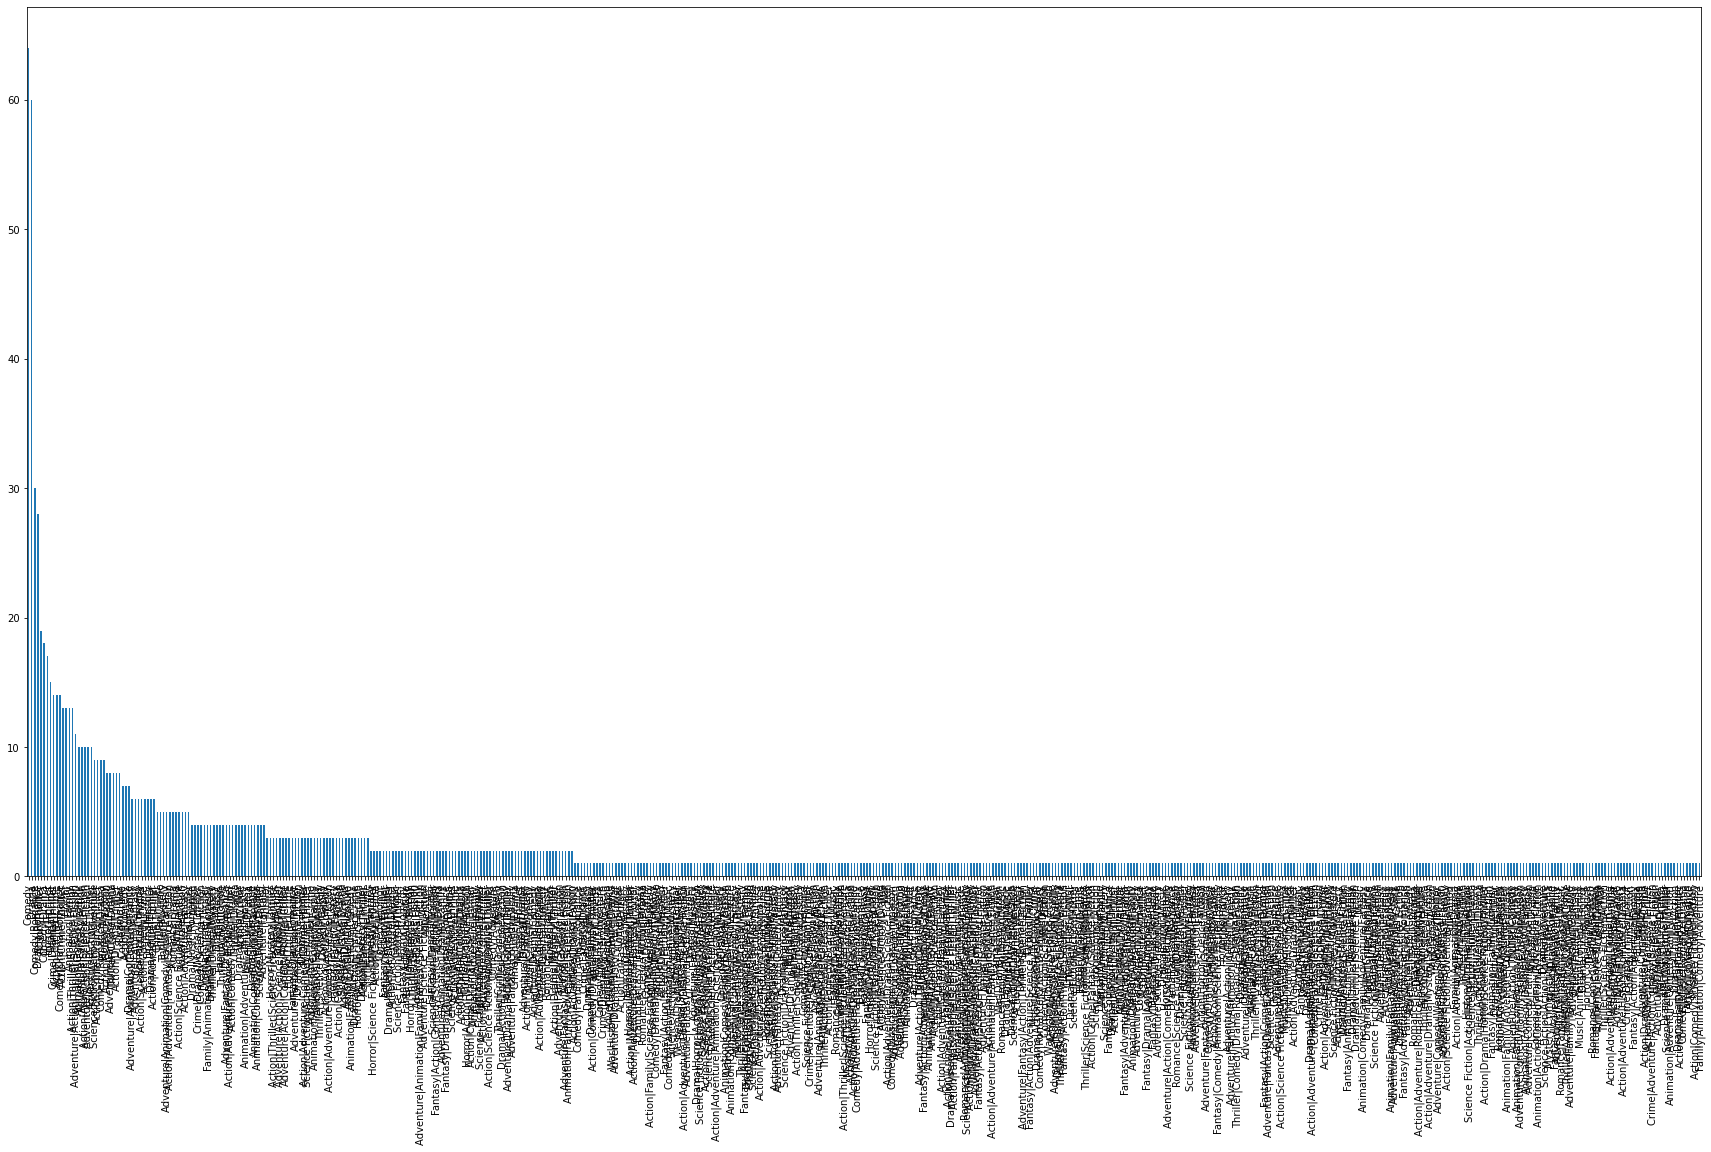

In [62]:
df3_clean['genres'].value_counts().plot(kind='bar' ,figsize=(30,16));

In [63]:
# Comedy is the most popular one

### Research Question 7 :
### What is the relationship between movie' budget and its revenue?

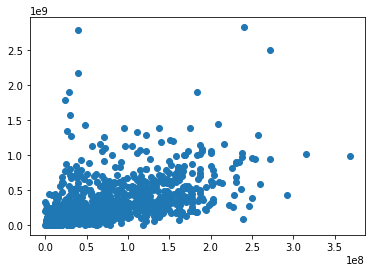

In [67]:
plt.scatter( df3_clean.budget_adj , df3_clean.revenue_adj)
plt.show()

In [68]:
# add trendline for better understanding (clearer view)

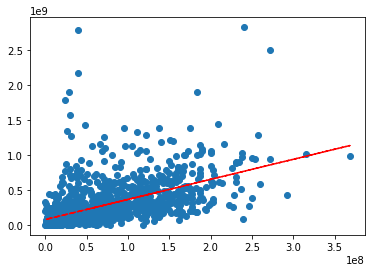

In [69]:
plt.scatter( df3_clean.budget_adj , df3_clean.revenue_adj)
# add trendline to scatter graph
z=np.polyfit(df3_clean.budget_adj , df3_clean.revenue_adj , 1)
p=np.poly1d(z)
plt.plot(df3_clean.budget_adj , p(df3_clean.budget_adj) , "r--")

plt.show()

In [70]:
# from the trendline (red colored), it seems that the revenue is directly (positively) proportional with the budget.
# Positive slop line i.e. while budget is increasing, the revenue will increase. 

### Research Question 8 :
### What is the total revenue of each year ? ( cumulative sum of revenue of this industry / business year by year )

In [71]:
# calculate the cumulative sum for each year
df3_clean.groupby(['release_year'])['revenue_adj'].sum()

release_year
1960    2.359350e+08
1961    1.644116e+09
1962    9.342150e+08
1963    6.785694e+08
1964    1.663453e+09
1965    1.129535e+09
1967    2.027970e+09
1968    7.742560e+08
1970    3.126928e+08
1971    1.647277e+08
1972    1.277914e+09
1973    2.324759e+09
1974    7.244416e+08
1975    2.368955e+09
1976    6.870147e+08
1977    4.020297e+09
1978    2.012412e+09
1979    1.528208e+09
1980    2.127680e+09
1981    1.136087e+09
1982    3.205106e+09
1983    1.398061e+09
1984    2.864099e+09
1985    2.292986e+09
1986    1.610373e+09
1987    1.299222e+09
1988    2.614455e+09
1989    4.154928e+09
1990    4.941978e+09
1991    3.420697e+09
1992    4.571464e+09
1993    3.915268e+09
1994    5.455439e+09
1995    6.225881e+09
1996    4.806274e+09
1997    8.990076e+09
1998    6.951654e+09
1999    9.423994e+09
2000    7.524298e+09
2001    1.171163e+10
2002    1.079394e+10
2003    1.184191e+10
2004    1.453219e+10
2005    1.160993e+10
2006    1.117713e+10
2007    1.518817e+10
2008    1.500978e+10


In [72]:
 df3_clean.groupby(['release_year'])['revenue_adj'].sum().max()

22901228034.779617

In [73]:
df3_clean.groupby(['release_year'])['revenue_adj'].sum().min()

164727727.2377233

<AxesSubplot:xlabel='release_year'>

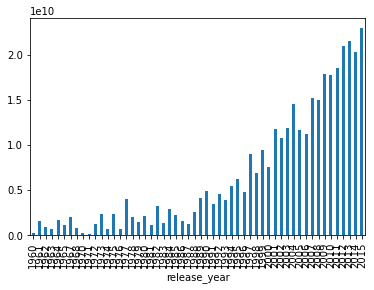

In [74]:
groups=df3_clean.groupby(['release_year'])['revenue_adj'].sum()
groups.plot.bar()

In [75]:
# Year 2015 has the highest accumulated revenue

<a id='conclusions'></a>
## Conclusions

> In this project, descriptive statistics and visualtization are used to draw some conclusions.
Python functions and methods are used to address and answer the eight questions and queries that mentioned before in the introduction section.

>>**It is found that**:
>
>>Best movie according to viewers' ratings is "The Shawshank Redemption" for the director "Frank Darabont" which released in 1994. It has the highest true vote score (IMDB’ Weighted Rating) of 8.2, so it is recommended to watch.
>
>>"The Boy Next Door" is the worst movie that directed by "Rob Cohen" in 2015. Its WR score is 4.6.
>
>>The best movie for each year is extracted and provided in a detailed list consisted of 54 movies with full movie data.
>
>>Top 10 list is provided (the best 10 movies)
>
>>The worst 10 movies list.
>
>>Comedy is the most popular genre.
>
>>It seems that the revenue is directly (positively) proportional with the budget. Positive slop trend line in graph clarify this relationship i.e. while budget is increasing, the revenue will increase.
>
>>Total revenue (i.e. cumulative sum of revenue of each year) is calculated for each year, then graphed to detect influence of this industry/business on the economy. It is detected that 2015 has the highest revenue.


